In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [60]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [61]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [62]:
df.shape

(129880, 24)

In [64]:
for col in df:
    df.rename(columns={col: col.lower().replace(' ', '_').replace('-', '_')}, inplace=True)

In [66]:
df.columns

Index(['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check_in_service', 'online_boarding', 'gate_location',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [90]:
df['score'] = \
    df.departure_and_arrival_time_convenience + \
    df.ease_of_online_booking + \
    df.check_in_service + \
    df.online_boarding + \
    df.gate_location + \
    df.on_board_service + \
    df.online_boarding + \
    df.gate_location + \
    df.on_board_service + \
    df.seat_comfort + \
    df.leg_room_service + \
    df.cleanliness + \
    df.food_and_drink + \
    df.in_flight_service + \
    df.in_flight_wifi_service + \
    df.in_flight_entertainment + \
    df.baggage_handling

In [99]:
df.drop(columns=['departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check_in_service', 'online_boarding', 'gate_location',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling'], inplace=True)

In [100]:
df.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,satisfaction,score
0,1,Male,48,First-time,Business,Business,821,2,5.0,Neutral or Dissatisfied,63
1,2,Female,35,Returning,Business,Business,821,26,39.0,Satisfied,65
2,3,Male,41,Returning,Business,Business,853,0,0.0,Satisfied,67
3,4,Male,50,Returning,Business,Business,1905,0,0.0,Satisfied,64
4,5,Female,49,Returning,Business,Business,3470,0,1.0,Satisfied,60


In [101]:
df.satisfaction.value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: satisfaction, dtype: int64

# H0: у удовлетворенных и неудовлетворенных клиентов одинаковые оценки

In [362]:
df \
    .groupby('satisfaction') \
    .score \
    .agg(['mean', 'median', 'count'])


,mean,median,count
satisfaction,,,
Neutral or Dissatisfied,50.014036,50.0,73452
Satisfied,61.467924,62.0,56428


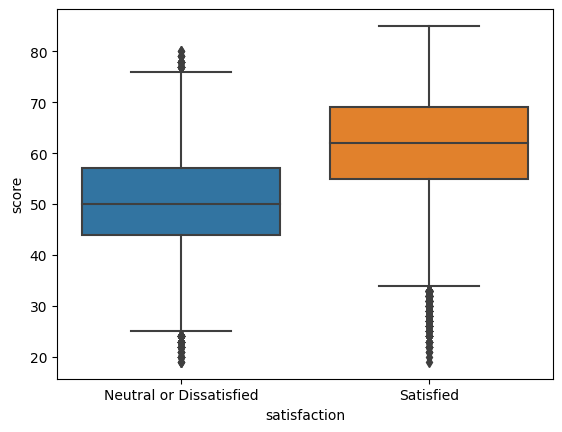

In [105]:
sns.boxplot(data=df, x='satisfaction', y='score')

plt.show()

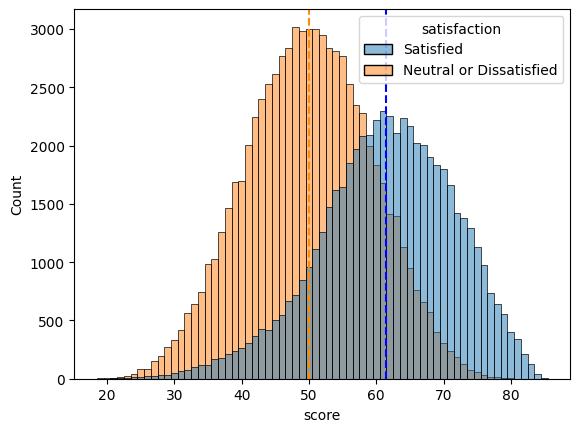

In [229]:
sns.histplot(data=df, x='score', hue='satisfaction', hue_order=['Satisfied', 'Neutral or Dissatisfied'], discrete=True)

dissat_mean = plt.axvline(df.query('satisfaction == "Satisfied"').score.mean() \
                      , color='blue', linestyle='--')

sat_mean = plt.axvline(df.query('satisfaction == "Neutral or Dissatisfied"').score.mean() \
                      , color='darkorange', linestyle='--')

plt.show()

In [205]:
# проверим нормальность обоих распределений

# на самом деле в данном случае нормальность нельзя разглядеть уже при выборке в 2000 значений

sat = stats.shapiro(df.query('satisfaction == "Neutral or Dissatisfied"').score)
dissat = stats.shapiro(df.query('satisfaction == "Satisfied"').score)

sat.pvalue, dissat.pvalue

(8.644392674873567e-32, 0.0)

In [207]:
# придется по классике, Манна-Уитни

stats.mannwhitneyu(df.query('satisfaction == "Neutral or Dissatisfied"').score, \
                  df.query('satisfaction == "Satisfied"').score)

MannwhitneyuResult(statistic=828640818.0, pvalue=0.0)

Было и так довольно очевидно, но убедиться стоило. Удовлетворенные и неудовлетворенные клиенты по-разному оценивают полеты.
Довольно обоснованно предположить, что у удовлетворенных клиентов оценка в среднем выше.

# H0: у мужчин и женщин одинаковые оценки

In [361]:
df \
    .groupby('gender') \
    .score \
    .agg(['mean', 'median', 'count'])

,mean,median,count
gender,,,
Female,54.957799,55.0,65899
Male,55.023820,55.0,63981


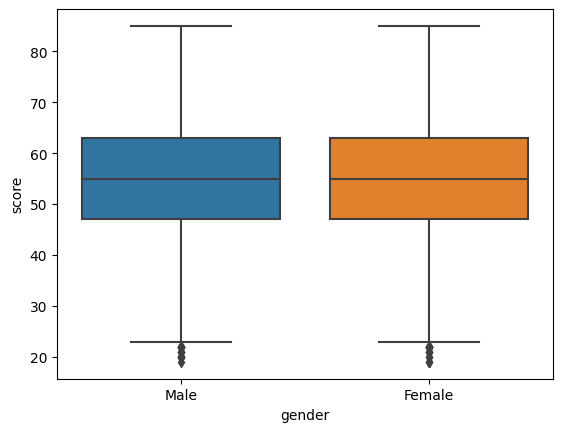

In [225]:
sns.boxplot(data=df, x='gender', y='score')

plt.show()

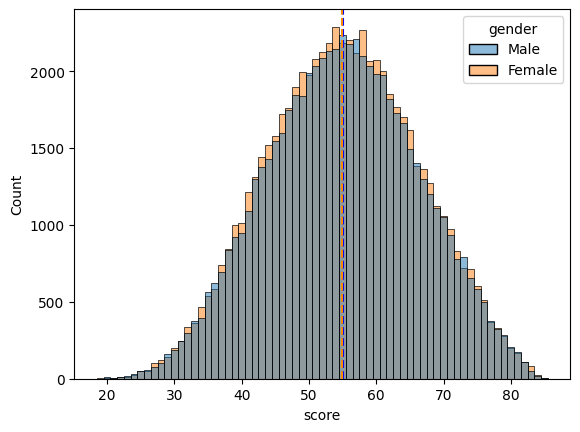

In [240]:
sns.histplot(data=df, x='score', hue='gender', discrete=True)

male_mean = plt.axvline(df.query('gender == "Male"').score.mean(), linestyle='--' \
                        , color = 'blue')

female_mean = plt.axvline(df.query('gender == "Female"').score.mean(), linestyle='--' \
                        , color = 'darkorange')

plt.show()

In [245]:
shapiro_male = stats.shapiro(df.query('gender == "Male"').score).pvalue
shapiro_female = stats.shapiro(df.query('gender == "Female"').score).pvalue

shapiro_male, shapiro_female

# ненормально, разумеется

(1.3561294625254346e-35, 3.928749430569379e-37)

In [247]:
stats.mannwhitneyu(df.query('gender == "Male"').score, df.query('gender == "Female"').score).pvalue

0.25682317671502586

У мужчин и женщин оценки значимо не отличаются.

# H0: люди разных возрастов ставят одинаковые оценки

In [262]:
np.sort(df.age.unique())

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85], dtype=int64)

Поделю клиентов на импровизированные 4 категории по возрасту:

1) Дети: 7-17 лет
2) Молодежь: 18-30 лет
3) Зрелые: 31-50 лет
4) Престарелые: 51+ лет

In [296]:
# разбиваю клиентов на возрастные группы

df['age_category'] = pd.cut(df['age'], \
                                     bins=[0, 17, 30, 50, 1000], \
                                     labels=['child', 'young', 'mature', 'old'])

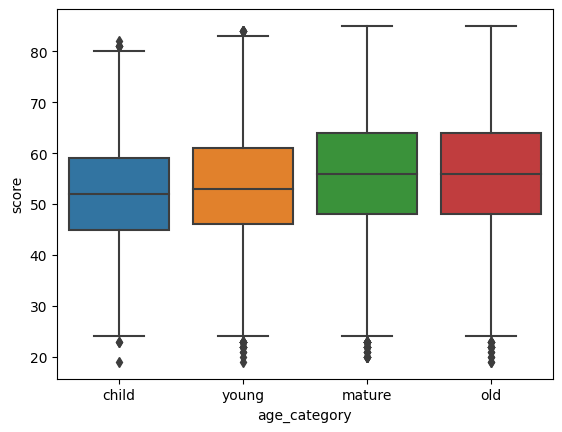

In [314]:
sns.boxplot(data=df, x='age_category', y='score')

plt.show()

In [360]:
df \
    .groupby('age_category') \
    .score \
    .agg(['mean', 'median', 'count'])

,mean,median,count
age_category,,,
child,52.006398,52.0,9847
young,53.106661,53.0,31033
mature,56.016463,56.0,55398
old,55.912654,56.0,33602


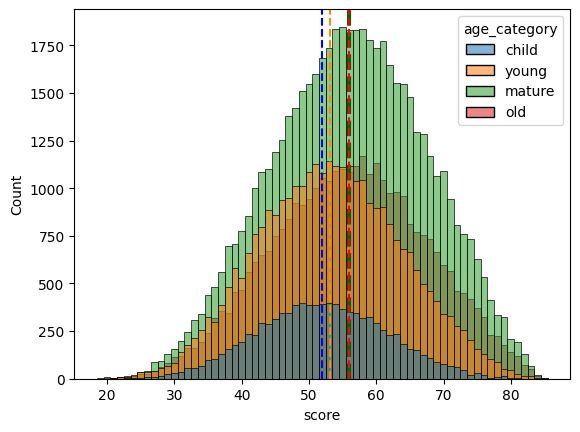

In [337]:
sns.histplot(data=df, x='score', hue='age_category', discrete=True, alpha=0.55)

plt.axvline(df.query('age_category == "child"').score.mean(), linestyle='--', color='blue')
plt.axvline(df.query('age_category == "young"').score.mean(), linestyle='--', color='darkorange')
plt.axvline(df.query('age_category == "mature"').score.mean(), linestyle='--', color='darkgreen', linewidth=3)
plt.axvline(df.query('age_category == "old"').score.mean(), linestyle='--', color='red')

plt.show()

In [344]:
# уже просто для галочки поймем, что эти распределения не похожи на нормальные

print('child:', stats.shapiro(df.query('age_category == "child"').score).pvalue, '\n' \
         ,'young:', stats.shapiro(df.query('age_category == "young"').score).pvalue, '\n' \
         ,'mature:', stats.shapiro(df.query('age_category == "mature"').score).pvalue, '\n' \
         ,'old:', stats.shapiro(df.query('age_category == "old"').score).pvalue)

child: 3.484520727514706e-10 
 young: 1.2723033458191263e-23 
 mature: 9.442666517434352e-39 
 old: 7.313318825533508e-31


C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [346]:
stats.kruskal(df.query('age_category == "child"').score \
                 ,df.query('age_category == "young"').score \
                 ,df.query('age_category == "mature"').score \
                 ,df.query('age_category == "old"').score).pvalue

0.0

Статистическая значимость в различияхх между оценками клиентов разных возрастных групп действительно присутствует.
В случае имеющихся данных различия следующие:
1) дети ставят самые низкие оценки
2) у молодежи оценки выше, чем у деетй, но меньше, чем у лругих
3) взрослые и престарелые ставят примерно одинаковые оценки

# H0: у новых и повторных клиентов оценки не различаются

In [348]:
df.customer_type.value_counts()

# довольно интересно, что подавляющая часть клиентов - повторные

Returning     106100
First-time     23780
Name: customer_type, dtype: int64

In [359]:
df.groupby('customer_type') \
    .score \
    .agg(['mean', 'median', 'count'])

,mean,median,count
customer_type,,,
First-time,51.690454,52.0,23780
Returning,55.729915,56.0,106100


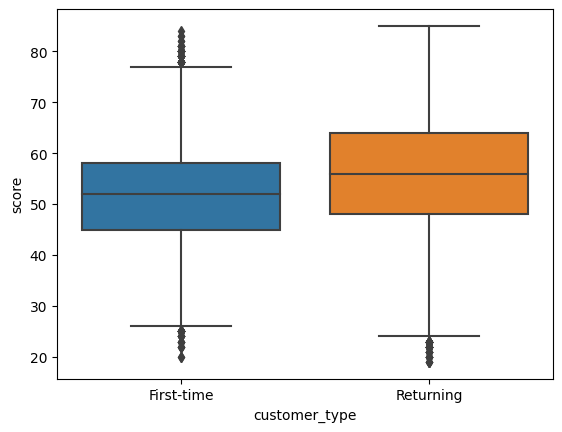

In [351]:
sns.boxplot(data=df, x='customer_type', y='score')

plt.show()

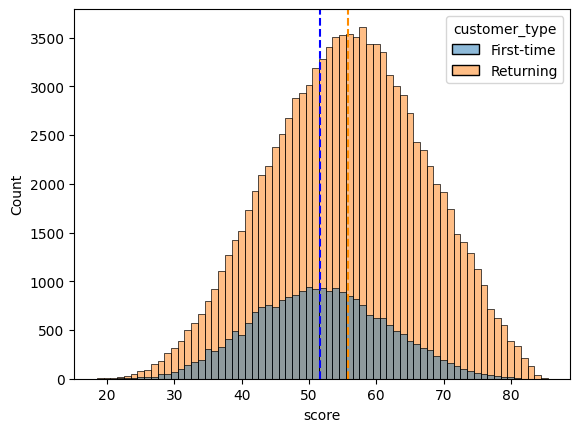

In [358]:
sns.histplot(data=df, x='score', hue='customer_type', discrete=True)

plt.axvline(df.query('customer_type == "First-time"').score.mean(), linestyle='--', color='blue')
plt.axvline(df.query('customer_type == "Returning"').score.mean(), linestyle='--', color='darkorange')

plt.show()

In [382]:
# не теряем надежды на проведение теста Стьюдента

stats.shapiro(df.query('customer_type == "First-time"').score).pvalue, \
stats.shapiro(df.query('customer_type == "Returning"').score).pvalue

# Манн-Уитни - наше все

(1.1904813264225151e-20, 3.783505853677006e-44)

In [384]:
stats.mannwhitneyu(df.query('customer_type == "First-time"').score \
                        ,df.query('customer_type == "Returning"').score).pvalue

0.0

Оценки различаются. Повторные клиенты, вероятнее всего, ставят более высокие оценки, нежели новые.

# H0: оценки не различаются в зависимости от цели поездки

In [386]:
df \
    .groupby('type_of_travel') \
    .score \
    .agg(['mean', 'median', 'count'])

,mean,median,count
type_of_travel,,,
Business,56.045834,56.0,89693
Personal,52.634534,53.0,40187


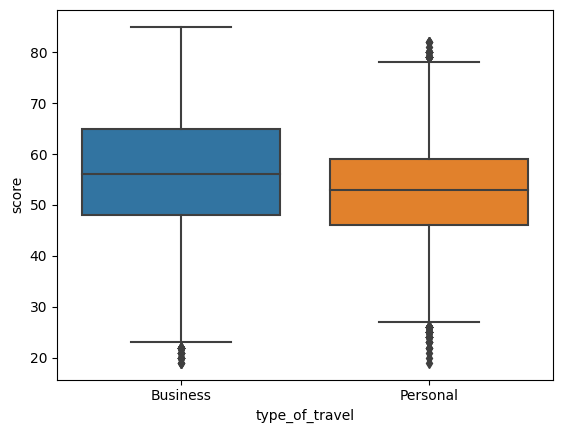

In [388]:
sns.boxplot(data=df, x='type_of_travel', y='score')

plt.show()

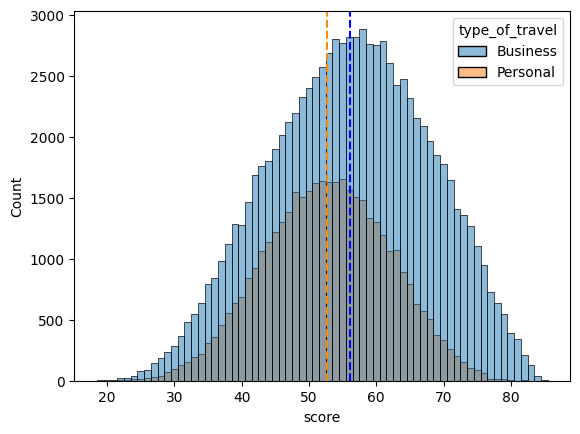

In [402]:
sns.histplot(data=df, x='score', hue='type_of_travel', discrete=True)

plt.axvline(df.query('type_of_travel == "Business"').score.mean(), linestyle='--', color='blue')
plt.axvline(df.query('type_of_travel == "Personal"').score.mean(), linestyle='--', color='darkorange')

plt.show()

In [404]:
stats.shapiro(df.query('type_of_travel == "Business"').score).pvalue, \
stats.shapiro(df.query('type_of_travel == "Personal"').score).pvalue

(0.0, 2.667317003116821e-24)

In [406]:
stats.mannwhitneyu(df.query('type_of_travel == "Business"').score \
                  ,df.query('type_of_travel == "Personal"').score).pvalue

0.0

Оценки действительно различаются по типу поездки. Возможно, клиенты, которые путешествуют по бизнес целям меньше обращают внимания на комфорт перелета, поэтому не занижают оценки так сильно, как люди, которые путешествуют в отпуск и т. п.

# H0: клиенты бизнес, эконом и эконом+ класса ставят одинаковые оценки

In [408]:
df \
    .groupby('class') \
    .score \
    .agg(['mean', 'median', 'count'])

,mean,median,count
class,,,
Business,58.445994,59.0,62160
Economy,51.832444,52.0,58309
Economy Plus,51.731166,52.0,9411


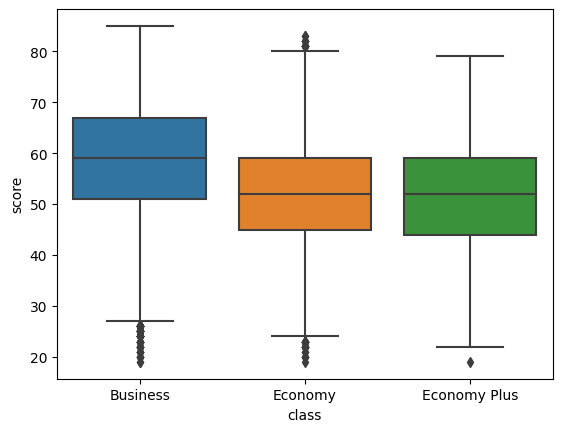

In [411]:
sns.boxplot(data=df, x='class', y='score')

plt.show()

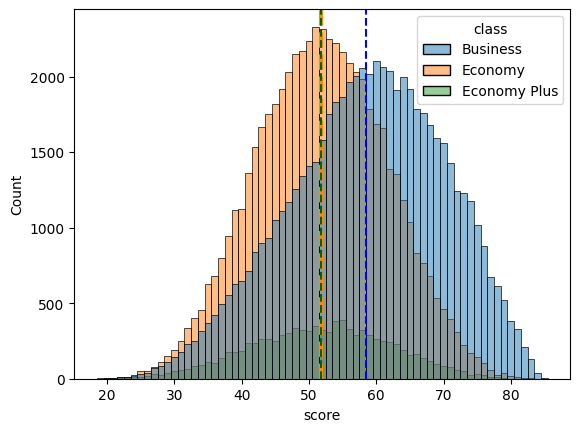

In [423]:
sns.histplot(data=df, x='score', hue='class', discrete=True)

plt.axvline(df[df['class'] == 'Business'].score.mean(), linestyle='--', color='blue')
plt.axvline(df[df['class'] == 'Economy'].score.mean(), linestyle='--', color='darkorange', linewidth=3)
plt.axvline(df[df['class'] == 'Economy Plus'].score.mean(), linestyle='--', color='darkgreen')

plt.show()

In [426]:
stats.shapiro(df[df['class'] == 'Business'].score).pvalue, \
stats.shapiro(df[df['class'] == 'Economy'].score).pvalue, \
stats.shapiro(df[df['class'] == 'Economy Plus'].score).pvalue

(0.0, 9.750242210589975e-27, 2.6860251202469277e-15)

In [427]:
stats.kruskal(df[df['class'] == 'Business'].score \
             ,df[df['class'] == 'Economy'].score \
             ,df[df['class'] == 'Economy Plus'].score).pvalue

0.0

In [429]:
stats.mannwhitneyu(df[df['class'] == 'Economy Plus'].score \
                  ,df[df['class'] == 'Economy'].score).pvalue

0.8889933632589261

Оценки клиентов по классу посадочного места отличаются, однако у пассажиров эконом и эконом+ статистически значимой разницы не наблюдается.

# H0: оценки не зависят от дальности полета

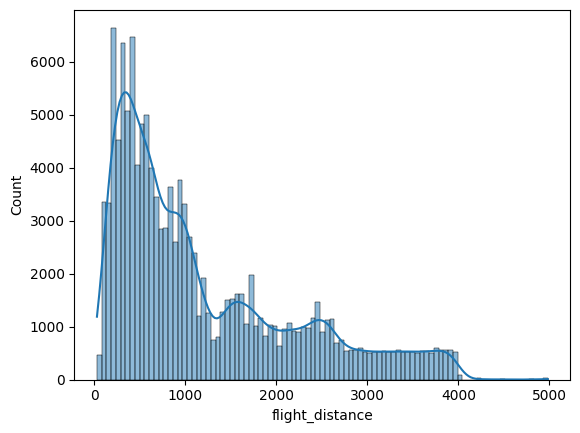

In [434]:
sns.histplot(data=df, x='flight_distance', kde=True)

plt.show()

In [435]:
stats.shapiro(df.flight_distance)

C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8642299771308899, pvalue=0.0)

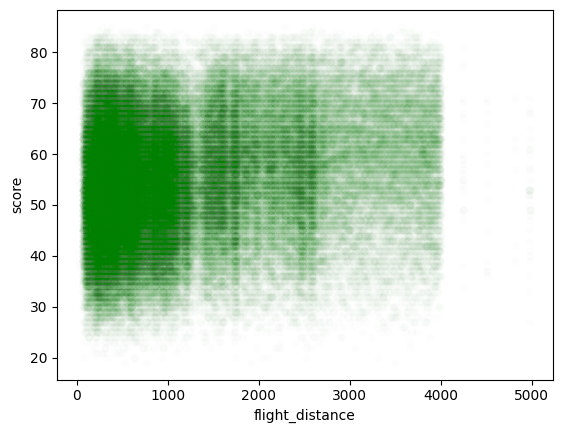

In [456]:
sns.scatterplot(data=df, x='flight_distance', y='score', color='green', alpha=0.01)

plt.show()

In [ ]:
# здесь когда-нибудь будет регрессионная модель и красивая линия тренда, но пока что к делу не относится

In [112]:
df.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,satisfaction,score
0,1,Male,48,First-time,Business,Business,821,2,5.0,Neutral or Dissatisfied,63
1,2,Female,35,Returning,Business,Business,821,26,39.0,Satisfied,65
2,3,Male,41,Returning,Business,Business,853,0,0.0,Satisfied,67
3,4,Male,50,Returning,Business,Business,1905,0,0.0,Satisfied,64
4,5,Female,49,Returning,Business,Business,3470,0,1.0,Satisfied,60
